In [1]:
from kagglegym import make
import kagglegym
import numpy as np
import pandas as pd
import random
import xgboost as xgb
from sklearn import ensemble, linear_model, metrics
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.preprocessing import Imputer, normalize
import time
import operator
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# initialize kaggle gym environment
env = make()
o = env.reset()

### Formatting and feature engineering

In [3]:
X = o.train[o.train.columns[2:-1]].copy()
y = o.train['y'].copy()

In [4]:
print X.shape
print y.shape

(806298, 108)
(806298,)


In [5]:
# number of nulls in a row
X["nbnulls"]=X.isnull().sum(axis=1)

In [6]:
nas_cols=['technical_9', 'technical_0', 'technical_32', 'technical_16', 'technical_38', 
'technical_44', 'technical_20', 'technical_30', 'technical_13']
for elt in nas_cols:
    X[elt + '_na'] = pd.isnull(X[elt]).apply(lambda x: 1 if x else 0)
    #no need to keep columns with no information
    if len(X[elt + '_na'].unique())==1:
        print("removed:", elt, '_na')
        del X[elt + '_na']
        nas_cols.remove(elt)

In [7]:
raw_train = o.train.fillna(o.train.rolling(min_periods=1, window=1000).median())
raw_train = raw_train.fillna(method='ffill')

In [8]:
print X.shape
print y.shape
X.columns

(806298, 118)
(806298,)


Index([      u'derived_0',       u'derived_1',       u'derived_2',
             u'derived_3',       u'derived_4',   u'fundamental_0',
         u'fundamental_1',   u'fundamental_2',   u'fundamental_3',
         u'fundamental_5',
       ...
               u'nbnulls',  u'technical_9_na',  u'technical_0_na',
       u'technical_32_na', u'technical_16_na', u'technical_38_na',
       u'technical_44_na', u'technical_20_na', u'technical_30_na',
       u'technical_13_na'],
      dtype='object', length=118)

In [9]:
model = xgb.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

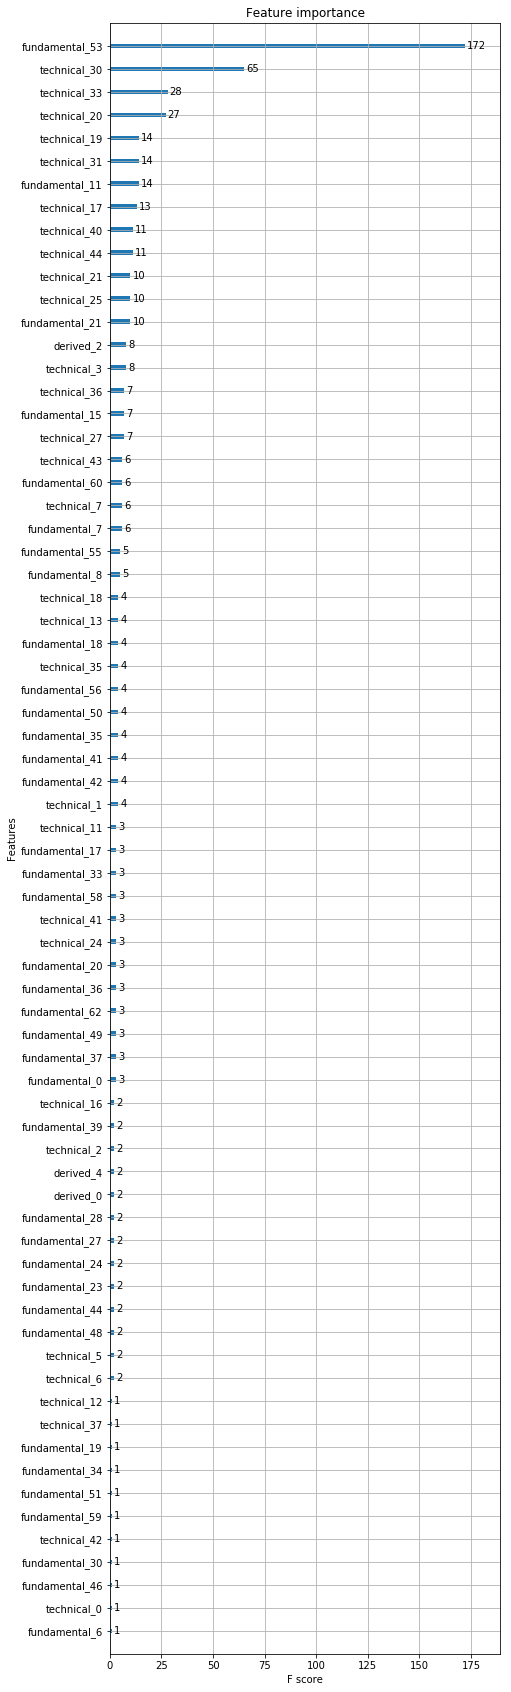

In [10]:
fig, ax = plt.subplots(figsize=(7, 30))
xgb.plot_importance(model, ax=ax)